<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">SUPERVISED LEARNING REGRESSION MINI PROJECT </h1>
     


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

<h2 class="list-group-item list-group-item-action active" >1. Read the dataset likes.csv </h2>

In [2]:
df = pd.read_csv("likes.csv")
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,1098638,13,2,2000,2,male,0,0,0,1,0,0,0,1,0
1,2063204,14,22,1999,1,male,104,0,0,1,0,0,0,1,0
2,1579594,19,18,1994,10,female,212,0,0,1,0,0,0,1,0
3,1979672,21,1,1992,1,male,328,0,0,1,0,0,0,1,0
4,1344831,23,10,1990,2,male,580,0,0,1,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 2104 non-null   int64 
 1   age                    2104 non-null   int64 
 2   dob_day                2104 non-null   int64 
 3   dob_year               2104 non-null   int64 
 4   dob_month              2104 non-null   int64 
 5   gender                 2102 non-null   object
 6   tenure                 2104 non-null   int64 
 7   friend_count           2104 non-null   int64 
 8   friendships_initiated  2104 non-null   int64 
 9   likes                  2104 non-null   int64 
 10  likes_received         2104 non-null   int64 
 11  mobile_likes           2104 non-null   int64 
 12  mobile_likes_received  2104 non-null   int64 
 13  www_likes              2104 non-null   int64 
 14  www_likes_received     2104 non-null   int64 
dtypes: int64(14), object(

<h2 class="list-group-item list-group-item-action active" >2. Basic EDA to understand dataset </h2>

>### 1.  Select more than five columns for EDA

 Step1: Each plot must Use the subplots 
 
             Plot 1: Histogram or bar, line and use suitable plots
             
             Plot2: Box plot 
             
 Step2: Write the inference is it data skewed or not

 Step3: Write the inference is it data having  outliers  or not



>### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

#### 1. likes

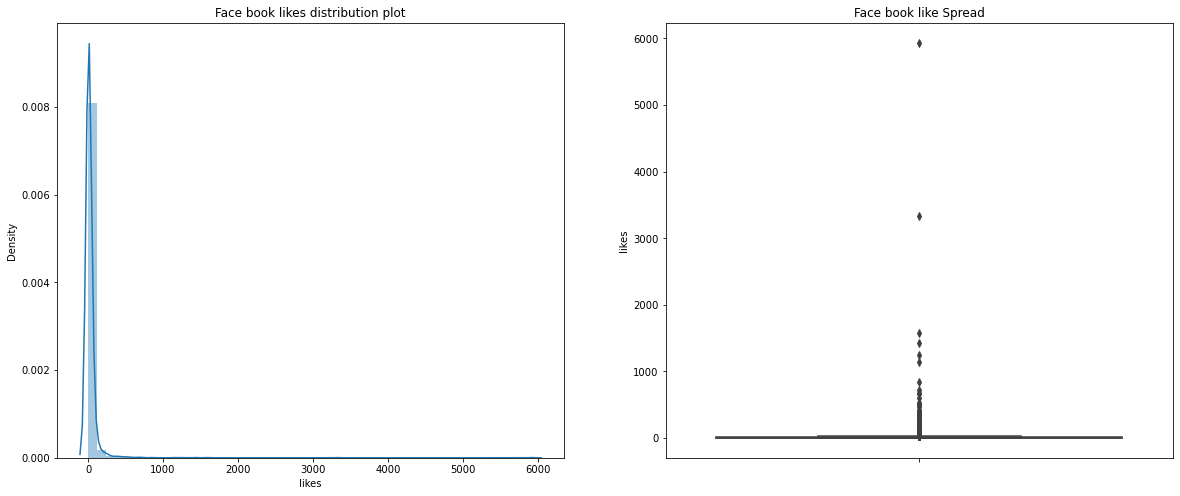

In [4]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Face book likes distribution plot')
sns.distplot(df.likes)
plt.subplot(1,2,2)
plt.title('Face book like Spread')
sns.boxplot(y=df.likes)
plt.show()

### Inference :

1. Histogram seems to be highly skewed




2. Box plot have  outliers

#### 2. Age

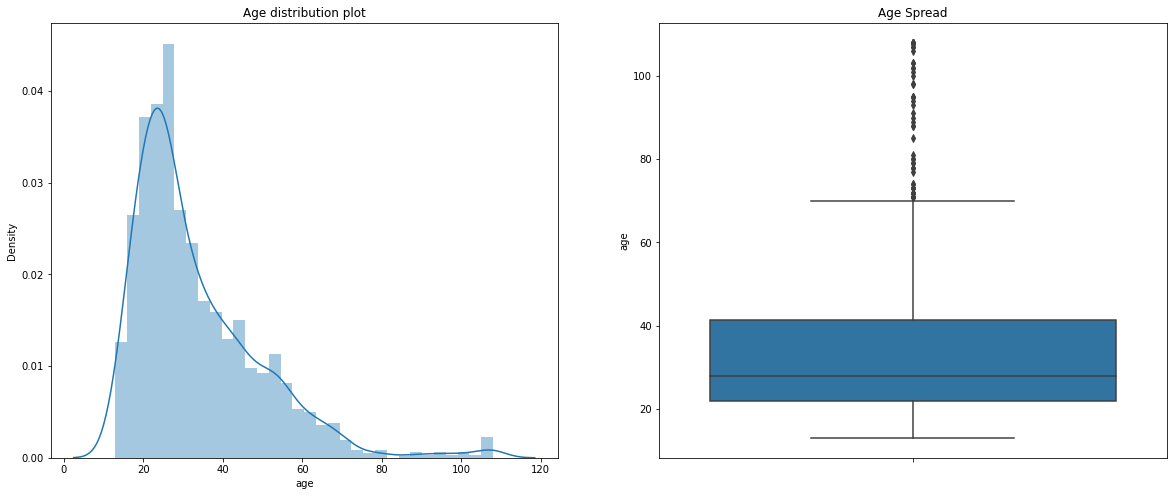

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Age distribution plot')
sns.distplot(df.age)
plt.subplot(1,2,2)
plt.title('Age Spread')
sns.boxplot(y=df.age)
plt.show()

### Inference :

1. Histogram seems to be highly skewed.
2. Box plot have  outliers

### 3. dob_day

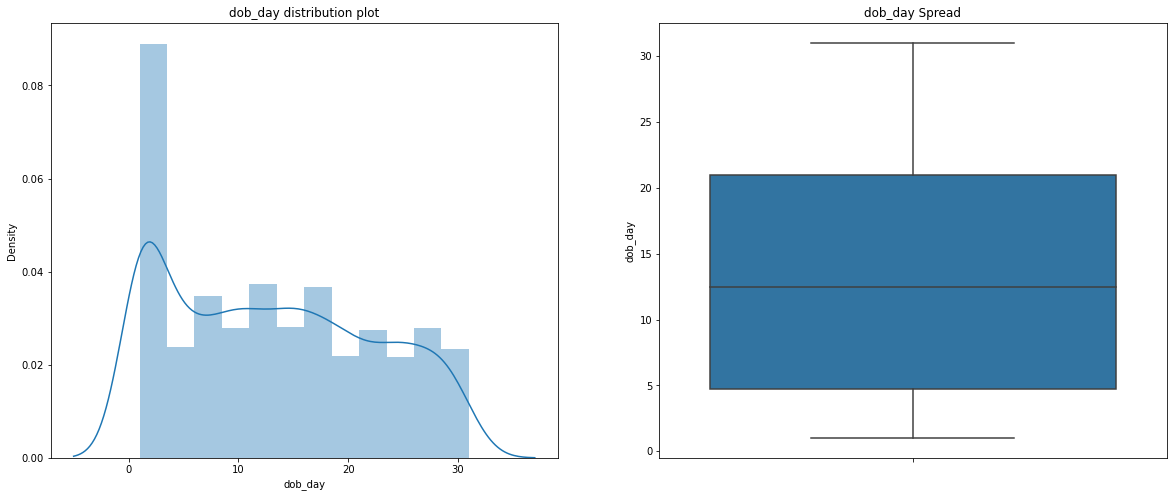

In [6]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('dob_day distribution plot')
sns.distplot(df.dob_day)
plt.subplot(1,2,2)
plt.title('dob_day Spread')
sns.boxplot(y=df.dob_day)
plt.show()

### Inference :

1. Histogram seems to be skewed.
2. we dont have outliers

#### 4. dob_year

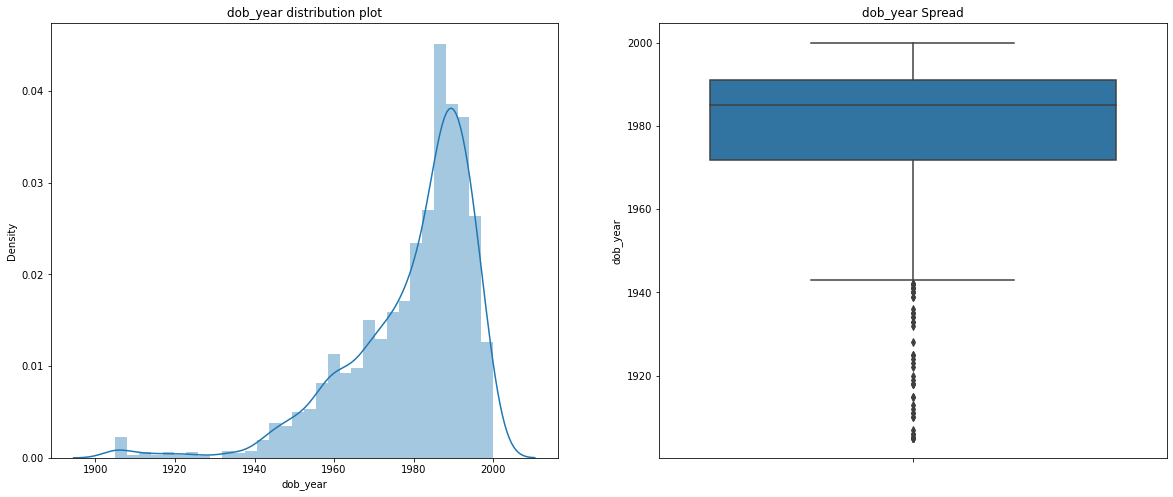

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('dob_year distribution plot')
sns.distplot(df.dob_year)
plt.subplot(1,2,2)
plt.title('dob_year Spread')
sns.boxplot(y=df.dob_year)
plt.show()

### Inference :

1. Histogram seems to be left skewed.
2. Yes we have outliers

#### 5. dob_month

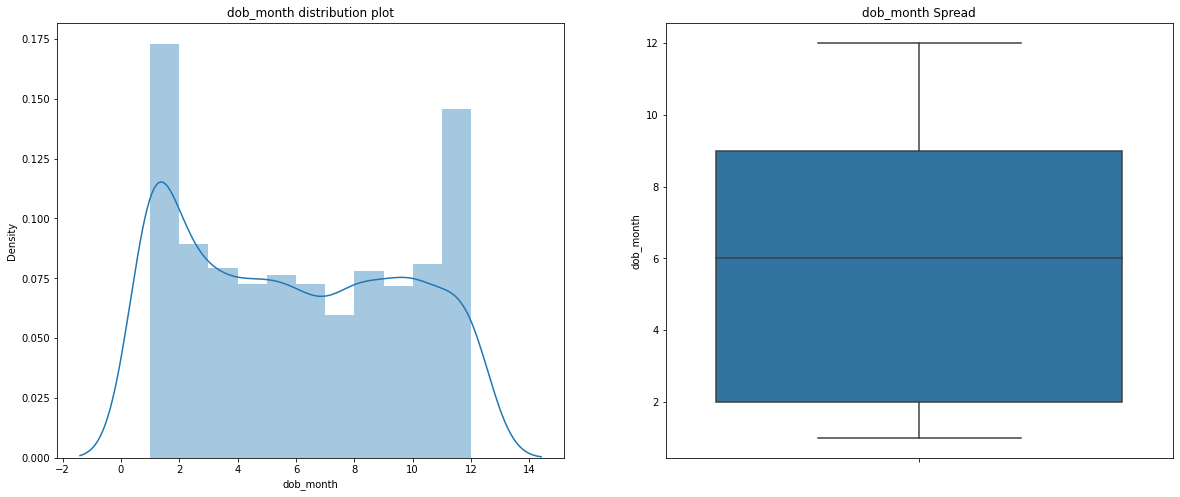

In [8]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('dob_month distribution plot')
sns.distplot(df.dob_month)
plt.subplot(1,2,2)
plt.title('dob_month Spread')
sns.boxplot(y=df.dob_month)
plt.show()

### Inference :

1. Histogram seems to be skewed.
2. we dont have outliers

#### 6. likes_received 

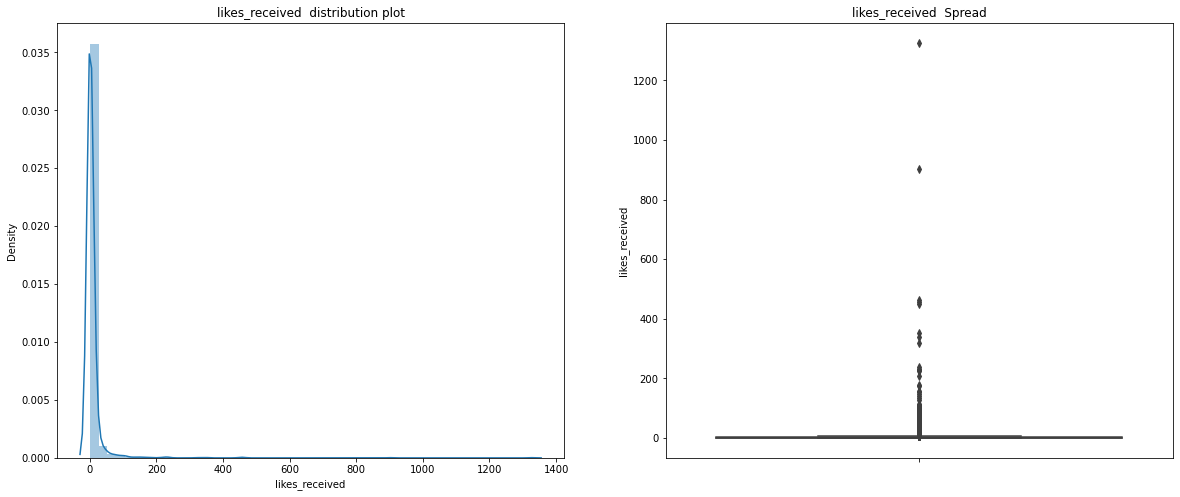

In [9]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('likes_received  distribution plot')
sns.distplot(df.likes_received )
plt.subplot(1,2,2)
plt.title('likes_received  Spread')
sns.boxplot(y=df.likes_received )
plt.show()

### Inference :

1. Histogram seems to be skewed.
2. we  have outliers

### 2.  Plot the heat map 
             
  Step1: Write the inference on the dependent variable and independent variable having the most (Positive and Negative) correlation columns 


  Step2: Write the inference on the correlation among independent variables

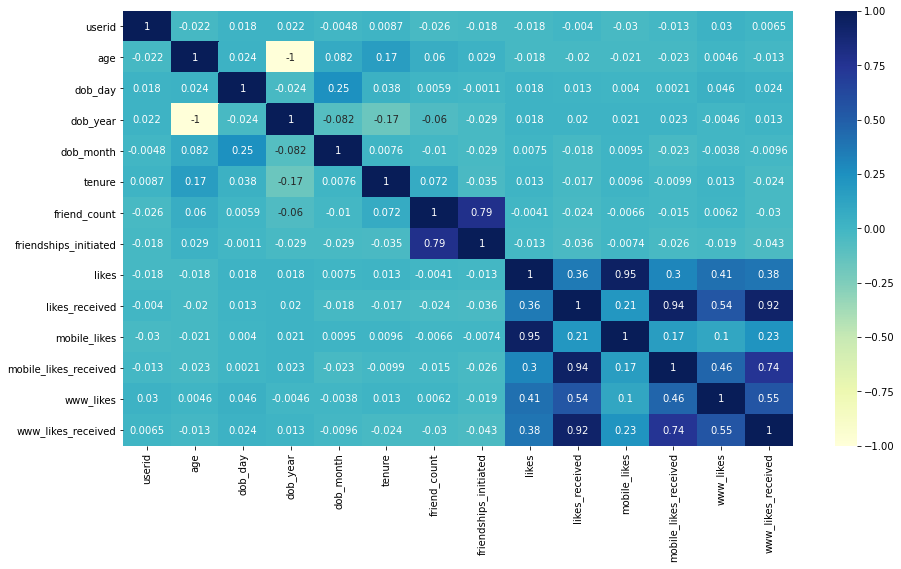

In [10]:
corr=df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

### Inference :

 1. <b> Dependent var and indep. var's<b>

> Positive corr: Likes highly correlated with mobile_likes and www_likes
    
> Negative corr: Likes negatively corr with friend_count and age

2. <b> Correlation among independent variables:<b>

> Many independent variables are highly correlated; www_likes_received, likes_received, mobile_likes_received are positively correlated 


Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

<h2 class="list-group-item list-group-item-action active" >3.Split dataset into train and test,Scaling    </h2>

>### 1. Split the dataset in dependent variable is [`likes`] and independent

>### 2. Convert categorical variables to numeric variables

>### 3. Scale the features 

>### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically? 
 

#### 1. Split the dataset in dependent variables and independent

In [11]:
X=df.drop(columns=['likes'])
y=df['likes']

#### 2. Convert categorical variables to numeric variables

In [12]:
dfX = pd.get_dummies(df,columns=['gender'])
dfX.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
0,1098638,13,2,2000,2,0,0,0,1,0,0,0,1,0,0,1
1,2063204,14,22,1999,1,104,0,0,1,0,0,0,1,0,0,1
2,1579594,19,18,1994,10,212,0,0,1,0,0,0,1,0,1,0
3,1979672,21,1,1992,1,328,0,0,1,0,0,0,1,0,0,1
4,1344831,23,10,1990,2,580,0,0,1,0,0,0,1,0,0,1


#### 3. Scale the features

In [13]:
from sklearn.preprocessing import scale
cols=dfX.columns
dfX_scaled=pd.DataFrame(scale(dfX))
dfX_scaled.columns=cols
dfX_scaled.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received', 'gender_female', 'gender_male'],
      dtype='object')

#### 4. Split dataset into train(70%) and test(30%).How would you ascertain this statistically?

In [14]:
dfX_scaled.describe()

#all numeric cols has means = 0 or as good as zero and std=1

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
count,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03,2.104000e+03
mean,3.015649e-16,1.269316e-16,-8.073390e-17,-3.283152e-15,-7.577378e-17,1.894872e-16,1.004351e-14,-1.115415e-14,1.752401e-16,-4.111888e-17,-3.999758e-17,-3.843963e-16,-4.366490e-17,3.833409e-16,-9.719728e-17,4.400789e-17
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-1.716836e+00,-1.264734e+00,-1.314345e+00,-4.617092e+00,-1.320351e+00,-9.235578e-01,-1.460491e+00,-1.170249e+00,-1.573334e-01,-1.772198e-01,-1.138846e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01,-7.076110e-01,-1.410190e+00
25%,-8.614077e-01,-7.075082e-01,-9.085145e-01,-4.843355e-01,-1.049932e+00,-7.420073e-01,-7.445375e-01,-3.650808e-01,-1.573334e-01,-1.772198e-01,-1.138846e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01,-7.076110e-01,-1.410190e+00
50%,-2.183791e-02,-3.360245e-01,-6.979869e-02,3.360245e-01,3.174600e-02,-2.814068e-01,-2.858371e-02,-3.650808e-01,-1.396253e-01,-1.548855e-01,-1.074418e-01,-1.584397e-01,-1.856960e-01,-1.737465e-01,-7.076110e-01,7.091242e-01
75%,8.459441e-01,4.843355e-01,8.500832e-01,7.075082e-01,8.430041e-01,3.775543e-01,6.873701e-01,4.400870e-01,-8.059825e-02,-1.102170e-01,-7.522795e-02,-8.098685e-02,-1.298652e-01,-1.285428e-01,1.413206e+00,7.091242e-01
max,1.746402e+00,4.617092e+00,1.932297e+00,1.264734e+00,1.654262e+00,6.819236e+00,2.119278e+00,2.855590e+00,3.488111e+01,2.943801e+01,3.663569e+01,2.613681e+01,2.921857e+01,2.907307e+01,1.413206e+00,7.091242e-01


In [15]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [16]:
X_train.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,-0.028346,-0.014551,-0.004513,0.014551,0.014661,0.021680,0.018595,0.011795,-0.011739,0.000984,-0.010074,0.005569,-0.007912,-0.004509,0.004131,-0.003553
std,1.011331,0.989837,1.001834,0.989837,1.008892,1.045908,0.997010,0.993250,1.018938,1.084080,1.007214,1.083394,1.053851,1.043676,1.001788,1.001579
min,-1.716836,-1.264734,-1.314345,-4.617092,-1.320351,-0.923558,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.185696,-0.173746,-0.707611,-1.410190
25%,-0.909130,-0.707508,-0.881459,-0.468857,-1.049932,-0.745369,-0.744537,-0.365081,-0.157333,-0.177220,-0.113885,-0.158440,-0.185696,-0.173746,-0.707611,-1.410190
50%,-0.081547,-0.336024,-0.123909,0.336024,0.031746,-0.274683,-0.028584,-0.365081,-0.145528,-0.154886,-0.107442,-0.158440,-0.185696,-0.173746,-0.707611,0.709124
75%,0.835410,0.468857,0.768917,0.707508,0.843004,0.408653,0.687370,0.440087,-0.086501,-0.110217,-0.075228,-0.080987,-0.129865,-0.128543,1.413206,0.709124
max,1.745882,4.617092,1.932297,1.264734,1.654262,6.819236,2.119278,2.855590,34.881106,29.438007,36.635694,26.136813,29.218566,29.073072,1.413206,0.709124


In [17]:
X_test.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
count,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000,632.000000
mean,0.066022,0.033892,0.010511,-0.033892,-0.034147,-0.050495,-0.043311,-0.027471,0.027341,-0.002292,0.023463,-0.012970,0.018428,0.010502,-0.009621,0.008275
std,0.971495,1.024045,0.997221,1.024045,0.979723,0.883495,1.007175,1.016590,0.955492,0.771144,0.984189,0.773237,0.863045,0.891589,0.997343,0.997851
min,-1.693882,-1.264734,-1.314345,-4.617092,-1.320351,-0.923558,-1.460491,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.185696,-0.173746,-0.707611,-1.410190
25%,-0.707359,-0.645594,-0.989681,-0.592685,-1.049932,-0.732762,-0.744537,-1.170249,-0.157333,-0.177220,-0.113885,-0.158440,-0.185696,-0.173746,-0.707611,-1.410190
50%,0.104431,-0.274111,-0.015688,0.274111,-0.238673,-0.296536,-0.028584,-0.365081,-0.139625,-0.154886,-0.107442,-0.158440,-0.185696,-0.173746,-0.707611,0.709124
75%,0.860672,0.592685,0.850083,0.645594,0.843004,0.295184,0.687370,0.440087,-0.073220,-0.087883,-0.075228,-0.080987,-0.129865,-0.128543,1.413206,0.709124
max,1.746402,4.617092,1.932297,1.264734,1.654262,4.869249,2.119278,2.855590,19.539983,10.141207,20.966870,15.215957,13.288156,16.235211,1.413206,0.709124


In [18]:
y_train.describe()

count    1472.000000
mean       25.665761
std       172.622353
min         1.000000
25%         1.000000
50%         3.000000
75%        13.000000
max      5937.000000
Name: likes, dtype: float64

In [19]:
y_test.describe()

count     632.000000
mean       32.286392
std       161.873624
min         1.000000
25%         1.000000
50%         4.000000
75%        15.250000
max      3338.000000
Name: likes, dtype: float64

<h2 class="list-group-item list-group-item-action active" >4.Model Building and Feature Selection using RFE(Recursive feature elimination)   </h2>

>### 1. Use Linear Regression

>### 2. Evaluation metrics like Rsqaure,Standard error/RMSE. Write the inference.

>### 3. Feature selection using RFE

Step1: Check the optimal number of features between 4 to 30

Step2: RFE with n features(LinearRegression) 

Step3: Specify the number of features

Step4: Fit with n features

Step5: Select features selected by rfe_n      

Step6:Training & test data for n selected columns        

Step7: Add a constant to the model       

Step8:Fit the ols model with n features

Step9: Calculate evaluation metrics

Step 10: Plot r2 and RMSE against n_features  

Step11: Write your final inference.    




>### 4. Model Bulding with optimal features count



In [20]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [21]:
from sklearn.metrics import r2_score
print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 1.0
R-sqaure on test data: 1.0
RMSE on train data: 2.277030390666756e-13
RMSE on test data: 2.1627185496882086e-13


<b>Massive overfitting: All features in model is never a good idea unless features are too less and all of them are important, 
so using Recursive feature elimination to reduce dimensionality<b>

##### Feature selection using RFE

In [22]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(1, 7)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]
   
   
    
    
for n_features in range(1, 7):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)
    


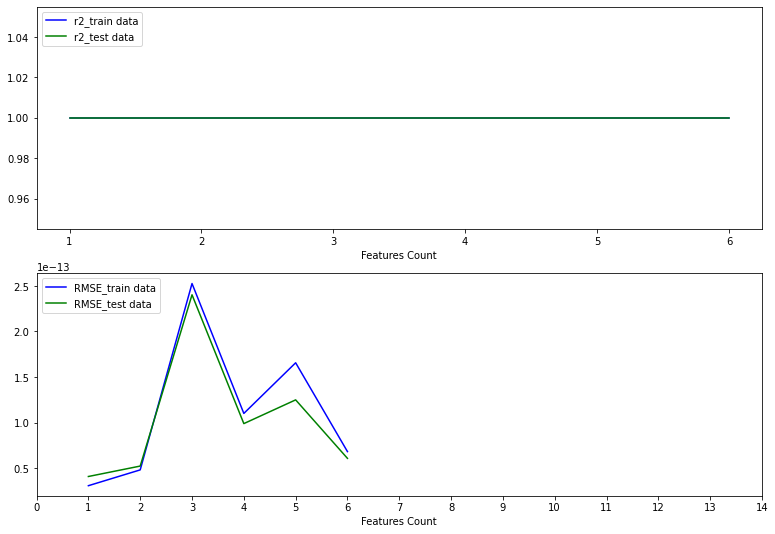

In [23]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 15, step=1))#method 2 of ticks

plt.show()

From the above graphs we find: 

1. R sqaure for test data peaks at 7 features and at this point model generalises well  as train R2 is v close to test. Train R2 keep on increasing beyond 7 features but R2 keeps increasing as you add more features to train data. We have select number of features where model accuracy and generalization both are at satisfactory level.

    
2. RMSE for test data is lowest at 7 features and beyond that it increases. Train RMSE at 7 also looks good, adding more features to train decreases RMSE but again there is always a trade off between removing features (aka reducing complexity) and model performance. So we will go with 13 features. 

##### Model Bulding with optimal features count

In [24]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 12 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()


#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())


----------------------R-sqaure-------------------------------------------
R-sq for test data is 1.0
R-sq for train data is 1.0
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 1.70613193948939e-13
RMSE for train data is 2.1494500469527812e-13
                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.555e+31
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:37:33   Log-Likelihood:                 40847.
No. Observations:                1472   AIC:                        -8.167e+04
Df Residuals:                    1460   BIC:                        -8.161e+04
Df Model:                          11                              

<b>Observations from above numbers:
    1. R-sqaure for both test & train looks good
    2. RMSE for both is closer (test is little < train which is fine and shows that model generalizes well)
                                                      
<b> Below Graph also shows predictions are mostly close to Actual values<b>

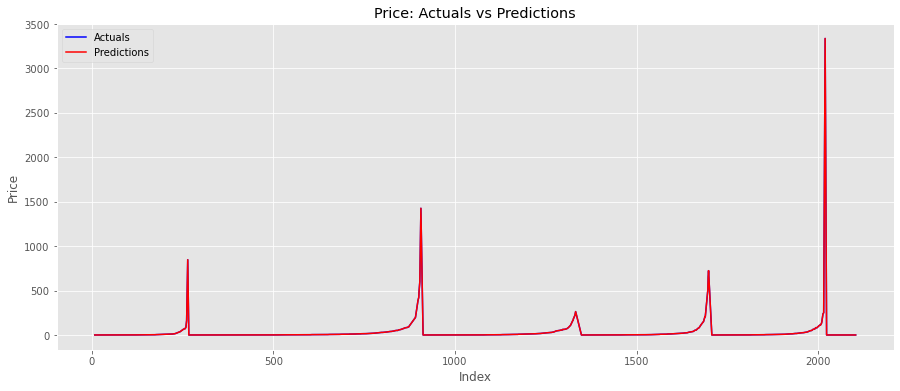

In [25]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')
plt.show()

In [26]:
#grabbing important features 
features_13=lm_sm.params.index
features_13=features_13[1:] #we don't want constant (const) in our imp features list so removing it
features_13

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'tenure',
       'friendships_initiated', 'likes', 'likes_received', 'mobile_likes',
       'www_likes', 'www_likes_received', 'gender_female'],
      dtype='object')

In [27]:
X_train[features_13].head(2)

,userid,age,dob_day,dob_year,dob_month,tenure,friendships_initiated,likes,likes_received,mobile_likes,www_likes,www_likes_received,gender_female
265,-0.10226,-1.017078,-1.314345,1.017078,-1.320351,0.902034,-0.365081,-0.157333,-0.17722,-0.113885,-0.167086,-0.173746,-0.707611
349,0.39662,-0.707508,1.174747,0.707508,0.843004,1.866941,-0.365081,-0.157333,-0.17722,-0.107442,-0.185696,-0.173746,-0.707611


<h2 class="list-group-item list-group-item-action active" >5.Linear Regression Assumptions Validation</h2>


>### 1. Linearity of the model
>### 2. Homoscedasticity (equal variance) of residuals
>### 3. Normality of residuals 
>### 4. Identifying Outliers/influential Cases

# 1. Linearity of the model

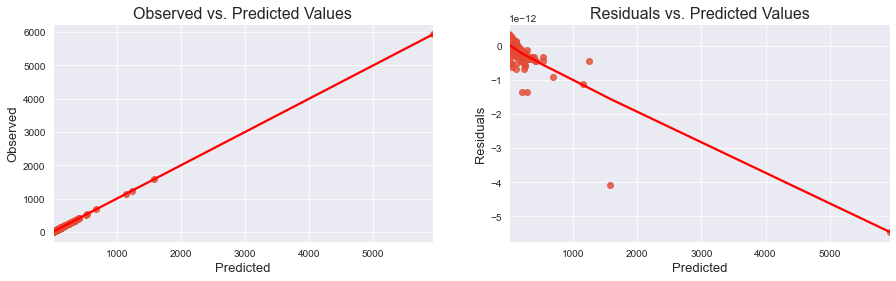

In [28]:
#To detect linearity lets inspect plots of observed vs. predicted values or residuals vs. predicted values. 
#The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot & 
#around horizontal line in the latter one

def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

<b> From above graphs <b>:
    
    1. Obs vs predicted  shows that most of the values are closer to the daigonal line, however some are not which 
       is a problem.
       
    2. Resi vs pred graph does not give a conclusive eviudence that residuals are evenly scattered around the zero line as            Resi. values increase with increase in predicted values, SO ASSUMPTION OF LINEARITY CAN'T BE CONFIRMED. 
    
    3. There seems to be presence of outliers, which might be giving a non-conclusive enough Resi vs Predicted graph. Some            points have very high residual values; a point (~ -3000,~ 8000) shows one value is predicted negatively by the model.          There are many other prominent high residual points which could be influential outliers.


# 2. Homoscedasticity (equal variance) of residuals

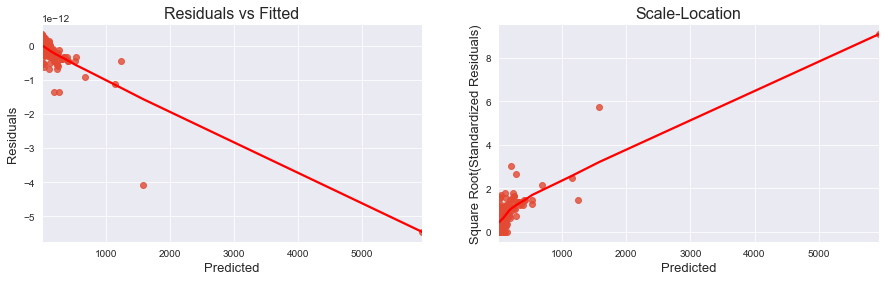

In [29]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')

    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

<b>The residuals seem to increase with increase in predicted/fitted values so homoscedasticity could not be confirmed, but we will make this graph after removing outliers and check again later in this notebook.

# 3. Normality of residuals

Jarque-Bera test ---- statistic: 8490966.4897, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.3373, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5000, p-value: 0.0000
Anderson-Darling test ---- statistic: 184.4610, 5% critical value: 0.7850
If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


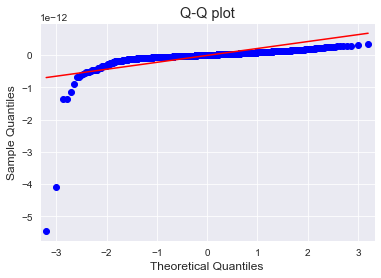

In [30]:
from scipy import stats

def normality_of_residuals_test(model):
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');
    

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned Anderson Draling statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lm_sm)

<b> Normality of errors not satisifed as:
    1. Q-Q Plot shows deviation from normal distirbution esp at tails
    2. P-value in first 3 normality tests<0.05 and Anderson-Darling statistic>AD critical value, thus null hypothesis that 
    errors have normal distribution is rejected

The reason could be outliers as we have seen above in Residuals vs Predicted graph that our data has outliers <b>

# 4. Identifying Outliers/influential Cases

In [31]:
#Function to plot standardized residuals vs Leverage and cook's distance for outlier detection

def influential_outlier_test(model,top_influencing_obs_count):
    
    influence = model.get_influence()

#leverage (hat values)
    leverage = influence.hat_matrix_diag

#When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), 
#the cases are influential to the regression results. The regression results will be altered if we exclude those cases.
    cooks_d = influence.cooks_distance

#standardized residuals= (Residual/STD of Residuals)
    standardized_residuals = influence.resid_studentized_internal

#studentized residuals
    studentized_residuals = influence.resid_studentized_external 
    
    
    plot_lm = plt.figure(figsize=(20,5))
    plt.scatter(leverage, standardized_residuals, alpha=0.5)
    sns.regplot(leverage, standardized_residuals,scatter=False,ci=False,lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plot_lm.axes[0].set_xlim(0, max(leverage)+0.01)
    plot_lm.axes[0].set_ylim(-6, 6)
    plot_lm.axes[0].set_title('Standardized Residuals vs Leverage',fontsize=16)
    plot_lm.axes[0].set_xlabel('Leverage',fontsize=13)
    plot_lm.axes[0].set_ylabel('Standardized Residuals',fontsize=13);

    # annotations- #annotating index position of the top n cook's D points 
    
    leverage_top_n_obs = np.flip(np.argsort(cooks_d[0]), 0)[:top_influencing_obs_count]  
    
    for i in leverage_top_n_obs:
        plot_lm.axes[0].annotate(i,xy=(leverage[i],studentized_residuals[i])) 
    
    
# shenanigans for cook's distance contours
    def graph(formula, x_range, label=None):
        x = x_range
        y = formula(x)
        plt.plot(x, y, label=label, lw=1, ls='--', color='red')

    p = len(lm_sm.params) # number of model parameters

    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(leverage), 50),'Cook\'s distance')#cookd= 0.5 line
    plt.legend(loc='upper right');

##### Outlier removal

In [32]:
X_train_no_outliers=X_train.drop(index=[206])
y_train_no_outliers=y_train.drop(index=[206])

<b> We will be using these for our further analysis:<b> <>X_train_no_outliers   and   y_train_no_outliers<>

<h2 class="list-group-item list-group-item-action active" >6.Rebuilding the Model: Feature Selection using RFE & K-Fold Cross Validation</h2>


>### A. Finding optimal feature count using RFE and plot the r2 and RMSE against n_features.

>### B. K-Fold Cross Validation

<b> A. Finding optimal feature count using RFE

In [33]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)  # specifying number of features

    # fit with n features
    rfe_n.fit(X_train_no_outliers, y_train_no_outliers)

    # selecting the features provided by rfe_n
    col_n = X_train_no_outliers.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # subsetting training & test data for n selected columns
    X_train_rfe_n = X_train_no_outliers[col_n]
    X_test_rfe_n = X_test[col_n]


    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n,has_constant='add')


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train_no_outliers, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))
    
    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train_no_outliers
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

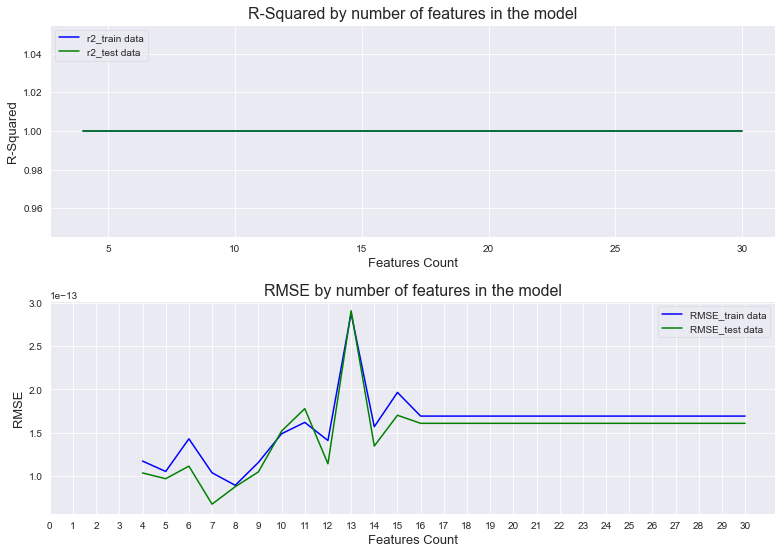

In [34]:
# plotting r2 and RMSE against n_features
fig,ax=plt.subplots(2,1,figsize=(13, 9))
plt.subplots_adjust(hspace = 0.3)
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count',fontsize=13)
ax[0].set_ylabel('R-Squared',fontsize=13)
ax[0].set_title('R-Squared by number of features in the model',fontsize=16)


ax[1].plot(n_features_list, train_RMSE, 'b',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count',fontsize=13)
ax[1].set_ylabel('RMSE',fontsize=13)
ax[1].set_title('RMSE by number of features in the model',fontsize=16)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper right')
plt.xticks(np.arange(0,31,1))

plt.show()

<b>From the above graphs we can't select optimal features for our model because:There appears to be high overfitting as diff between train & test Rsquare and RMSE is very high, our model wont generalize well and lead to bad predictions on test/unseen data.

In [35]:
RMSE_test_dividedby_train = [i / j for i, j in zip(test_RMSE, train_RMSE)]
RMSE_test_dividedby_train

[0.8830246274047528,
 0.9204089704834346,
 0.7789700337827411,
 0.6504642772849112,
 0.9816896098304446,
 0.9051610898111135,
 1.0207166701197092,
 1.0981469735514786,
 0.809047026125962,
 1.009710275054108,
 0.8578288684872897,
 0.8656429692445053,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078,
 0.950570351363078]

<b>To remedy overfitting/high performance difference between train & test data, we will do Kfold Cross Validation and try to determine optimal feature count

#  K-Fold Cross Validation

In [36]:
#Before implementing K-Fold I am removing the outliers from our X & Y Df's and creating new ones for CV purpose

X_new_cv = dfX_scaled.drop(index=[206]) # DF for K fold cross validation (cv)
y_new_cv = y.drop(index=[206]) 

In [37]:
#Resetting index as we need to use K-fold and thus index needs to be in proper order
X_new_cv.reset_index(inplace=True, drop=True)
X_new_cv.head(20)

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
0,-1.432558,-1.264734,-1.206123,1.264734,-1.049932,-0.923558,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
1,1.368312,-1.202820,0.958305,1.202820,-1.320351,-0.573905,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
2,-0.035976,-0.893250,0.525419,0.893250,1.113424,-0.210804,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1.413206,-1.410190
3,1.125755,-0.769422,-1.314345,0.769422,-1.320351,0.179194,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
4,-0.717672,-0.645594,-0.340352,0.645594,-1.049932,1.026429,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
5,0.600900,-0.645594,0.850083,0.645594,-0.779512,-0.923558,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1.413206,-1.410190
6,-1.069309,-0.459852,0.092533,0.459852,-1.049932,-0.644508,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
7,0.088612,-0.459852,-0.232131,0.459852,0.031746,-0.567181,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
8,0.806295,-0.336024,-1.314345,0.336024,-1.049932,-0.916834,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,-0.707611,0.709124
9,1.707602,-0.336024,1.282969,0.336024,-0.779512,-0.910110,-1.460491,-1.170249,-0.157333,-0.17722,-0.113885,-0.15844,-0.167086,-0.173746,1.413206,-1.410190


In [38]:
y_new_cv.reset_index(drop=True,inplace=True)
y_new_cv.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: likes, dtype: int64

In [39]:
print(X_new_cv.shape,y_new_cv.shape)

(2103, 16) (2103,)


# K-Fold Cross Validation

In [40]:
from sklearn.model_selection import KFold


K=5 #using 5 folds
kf = KFold(n_splits=K, shuffle=True, random_state=42)
   
for n_features in range(5,31):
    
    train_RMSE = []
    test_RMSE = []
    train_r2=[]
    test_r2=[]
    
    for train, test in kf.split(X_new_cv):
        
        lm = LinearRegression()
        
        rfe_n = RFE(estimator=lm, n_features_to_select=n_features)
        
        rfe_n.fit(X_new_cv.loc[train],y_new_cv[train])
        
        y_pred_train=rfe_n.predict(X_new_cv.loc[train])
        y_pred_test=rfe_n.predict(X_new_cv.loc[test])
        
        #R-square
        train_r2.append(r2_score(y_pred_train , y_new_cv[train]))
        test_r2.append(r2_score(y_pred_test , y_new_cv[test]))
        
        #Error
        error_train = y_pred_train - y_new_cv[train]
        error_test = y_pred_test - y_new_cv[test]
        rmse_train=((error_train**2).mean())**0.5
        rmse_test=((error_test**2).mean())**0.5
        
        train_RMSE.append(rmse_train)
        test_RMSE.append(rmse_test)
        
    test_times_train=np.mean(test_RMSE)/np.mean(train_RMSE)
         # generate report
    print('n_features:{:1} |train_R2:{:2} |test_R2:{:3} |mean(rmse_train):{:4} |mean(rmse_test):{:5} |RMSE(test/train):{}'.
          format(n_features, round(np.mean(train_r2),4), round(np.mean(test_r2),4),
                 round(np.mean(train_RMSE),0),
                 round(np.mean(test_RMSE),0),round(test_times_train,2)))

n_features:5 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.84
n_features:6 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.95
n_features:7 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.74
n_features:8 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):1.08
n_features:9 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.92
n_features:10 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.94
n_features:11 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.76
n_features:12 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.79
n_features:13 |train_R2:1.0 |test_R2:1.0 |mean(rmse_train): 0.0 |mean(rmse_test):  0.0 |RMSE(test/train):0.92
n_features:14 |

<b>From the above data we find:
    
1. Our model overfits as we increase the number of features 
